# Google Stock Price Prediction using Recurrent Neural Network

#### Part 1: Data Preprocessing

In [72]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# import training set
training_set=pd.read_csv('Google_Stock_Price_Train.csv')
print(training_set.info())
training_set=training_set.iloc[:,1:2].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None


In [74]:
#training_set.head()
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [75]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [76]:
# Geting the input and output
X_train= training_set[0:1257]
y_train= training_set[1:1258]

In [77]:
# Reshaping #(NumberOfSequences, TimeSteps, ElementsPerStep)
X_train=np.reshape(X_train, (1257 , 1 , 1))

#### Part 2: Building the RNN

In [78]:
# importing the Keras libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [79]:
# initialize the RNN
regressor = Sequential()

In [80]:
# adding the input layer and LSTM layer
regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

In [81]:
# adding the output layer
regressor.add(Dense( units=1 ))

In [82]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [83]:
regressor.summary()

#LSTM param formula params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
# value 4 here is the number of gates in the LSTM 

#params= 4*((1+1)*4+4^2)
# = 4*(2*4+16)
#  = 4*(8+16)
#  =4*24
# =96

#Dense Layer Params
# output shape of previous layer + output Shape of present layer

#    =LSTM(Output Shape)+ Dense(Output Shape)
$    =4+1
    =5


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [42]:
# fitting the RNN to the training set
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 0s 2ms/step - loss: 0.3919
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2926
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.2193
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1658
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1286
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1033
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0868
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0765
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0666
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0644
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0629
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 4ms/step - loss: 3.4035e-04
Epoch 101/200
40/40 [==============================] - 0s 4ms/step - loss: 3.3774e-04
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 3.3639e-04
Epoch 103/200
40/40 [==============================] - 0s 4ms/step - loss: 3.3543e-04
Epoch 104/200
40/40 [==============================] - 0s 4ms/step - loss: 3.3409e-04
Epoch 105/200
40/40 [==============================] - 0s 3ms/step - loss: 3.3297e-04
Epoch 106/200
40/40 [==============================] - 0s 3ms/step - loss: 3.2974e-04
Epoch 107/200
40/40 [==============================] - 0s 4ms/step - loss: 3.2866e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2684e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2620e-04
Epoch 110/200
40/40 [==============================] - 0s 4ms/step - loss: 3.2320e-04
Epoch 111/200
40/40 [==============================] - 0s 4ms/step -

40/40 [==============================] - 0s 4ms/step - loss: 2.6199e-04
Epoch 196/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6176e-04
Epoch 197/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6038e-04
Epoch 198/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6105e-04
Epoch 199/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6034e-04
Epoch 200/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6236e-04


In [43]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


#### Part 3: Making the Prediction and Visulising the result

In [63]:
# Geting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [64]:
# Geting the Predicted Stock Price of 2017
inputs = real_stock_price
inputs

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [65]:
inputs = sc.transform(inputs)


In [66]:
inputs

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [67]:
inputs = np.reshape(inputs, (20 , 1, 1))

In [68]:
inputs

array([[[778.81]],

       [[788.36]],

       [[786.08]],

       [[795.26]],

       [[806.4 ]],

       [[807.86]],

       [[805.  ]],

       [[807.14]],

       [[807.48]],

       [[807.08]],

       [[805.81]],

       [[805.12]],

       [[806.91]],

       [[807.25]],

       [[822.3 ]],

       [[829.62]],

       [[837.81]],

       [[834.71]],

       [[814.66]],

       [[796.86]]])

In [69]:
predicted_stock_price = regressor.predict(inputs)

In [70]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

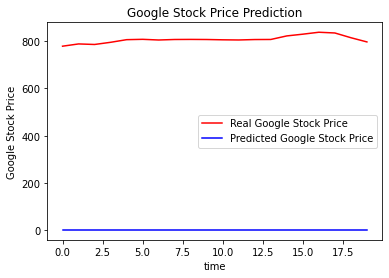

In [71]:
# Visulising the Result 
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()